# Calculating the environmental impact of power plants

**Table of contents**
- Overview
- Setup
  - Get Token
- Utility Functions
    - Function to call API
    - Input format for API
    - Accepted input values
- Use Case Implementation
  - Coal-Fired Power Plant Type
  - Natural Gas-Fired Power Plant Type
  - Oil-Fired Power Plant Type
  - Biomass-Fired Power Plant Type
  - Comparison of Emissions Between Power Plant Types
- Related Links

## Overview

APIs that are used in this sample: **IBM Environmental Intelligence Suite- Greenhouse Gas (GHG) Emissions - Stationary Emission API**

You can calculate greenhouse gas (GHG) emissions for different types of power plants. In the energy sector, emissions can vary significantly depending on the type of fuel used and the energy content that is associated with that fuel. The API allows us to calculate emissions based on the fuel type and fuel consumption amount.

The primary focus of this notebook is calculating emissions for different fuel types such as coal, oil, natural gas, and biomass, based on a given energy consumption using the **Stationary Emission API**.

Read this example to learn how to complete the following tasks:
- Input specific fuel data and energy content for various fuels.
- Retrieve and analyze emissions data based on the given energy content.
- Understand the impact of different fuels on overall GHG emissions in the power sector.

**Business value**

By leveraging these calculations, organizations can make data-driven decisions about fuel choices and their corresponding environmental impact, contributing to more sustainable energy generation.

**Use Case**

In this notebook, an example of Calculating the environmental impact of power plants will be used to identify oppurtunities for carbon reduction through efficiency improvemnets or cleaner fuel alternatives.

For more information on the Stationary GHG Emissions API Endpoint inputs and the output data points, see [GHG Emissions API Developer Guide](https://developer.ibm.com/apis/catalog/envintelsuite--ibm-environmental-intelligence/GHG+Emissions+API).


![Alt text](power_plant.png "Power Plant")

## Setup

Ensure that Python is installed in your system. Python 3+ is required.


<b>Note:</b> To run this notebook seamlessly, you have to first configure your credentials for GHG Emission APIs in a file named `secrets.ini` in the following format:

```
[EI]
api.api_key = <Your GHG APIs API key>
api.client_id = <Your GHG APIs client Id>
```

Keep the secrets.ini file at an appropriate relative location of this notebook, for example, as specified in this config:

```config.read('../../../auth/secrets.ini')```

In [140]:
# Install below packages using pip/pip3 based on your python version.
# pip install pandas,configparser,json,IPython
import pandas as pd
import configparser
import requests
import json
from IPython.display import display as display_summary
import matplotlib.pyplot as plt

### Get token

Run the following code snippet to generate the Auth Bearer Token by using your api_key configured in secrets.ini.

In [141]:
config = configparser.RawConfigParser()
config.read(['../../../auth/secrets.ini','../../../auth/config.ini'])

EI_API_KEY  = config.get('EI', 'api.api_key')
EI_CLIENT_ID = config.get('EI', 'api.client_id')
EI_AUTH_ENPOINT = config.get('EI', 'api.auth_endpoint')
EI_BASE_URL = config.get('EI', 'api.base_url')

def get_bearer_token(token):
    headers = {
        'Content-Type': 'application/json',
        'cache-control': 'no-cache',
    }
    data = {"apiKey":token, "clientId":EI_CLIENT_ID}
    bearer_token_req = requests.post(EI_AUTH_ENPOINT, headers=headers, data= json.dumps(data))
    if bearer_token_req.status_code != 200:
        print( "Error in getting Bearer token. Error code : ",bearer_token_req.status_code)
    return bearer_token_req.json()['access_token']

mybearer_token = get_bearer_token(EI_API_KEY)

## Utility Functions

Let us set up utility helper functions to run this use case.

### Function to call API

In [142]:
def call_carbon_api(co2_api, co2_data, token):
    headers = {
        'accept': 'application/json',
        'Authorization': 'Bearer '+token,
        'Content-Type': 'application/json',
    }

    co2_response_req = requests.post( co2_api, headers=headers, data=json.dumps(co2_data))
    if co2_response_req.status_code != 200:
        print( "Problem! Error in generating response. Error code : ",co2_response_req.status_code)
    return co2_response_req.json()

### Input format for API

In [143]:
def customer_id(customer_id):
    Input =  {
              "id": customer_id
          }
    return Input 

def customer_on_behalf_of_client(company_id,company_name):
    Input =  {
              "companyId": company_id,
              "companyName": company_name
          }
    return Input  


def customer_organisation(department_id,department_name):
    Input =  {
              "departmentId": department_id,
              "departmentName": department_name
          }
    return Input  


def customer_request_type(request_type):
    return request_type     


def customer_location(country,state_province,zip_post_code,city):
    Input =  {
              "country": country,
              "stateProvince": state_province,
              "zipPostCode": zip_post_code,
              "city": city
          }
    return Input        


def customer_site(site_id,site_name,building_id,building_name):
    Input = {
              "siteId": site_id,
              "siteName": site_name,
              "buildingId": building_id,
              "buildingName": building_name
          }               
    return Input

def stationary_input(sector,fuel_name,fuel_amount,fuel_unit,hv_basis):
    input = {"sector": sector,
             "fuelName": fuel_name,
             "fuelAmount": fuel_amount,
             "fuelUnit": fuel_unit,
             "hvBasis": hv_basis
            }
    return input

### Accepted input values



You can check the accepted values for the individual fields of the request payload. For more information, see [GHG Emissions API Developer Guide](https://developer.ibm.com/apis/catalog/envintelsuite--ibm-environmental-intelligence/GHG+Emissions+API#stationary).

## Use Case Implementation

### Coal-Fired Power Plant Type

You can measure the impact of a coal-fired power plant on the environment. In this example, the coal-fired power plant uses the lignite as fuel and the energy content is 5 GigaJoules (GJ). The output is the measurement of all the Greenhouse Gas Emissions.

In [144]:
fuel_type = "lignite"
energy_content = "5" #Giga Joule

In [145]:
request_payload ={'customID'        : customer_id(customer_id='6377709825425408'), 
                   'onBehalfOfClient': customer_on_behalf_of_client(company_id='1687653745426432',
                                                                 company_name='Mike Wright') , 
                   'organisation'    : customer_organisation(department_id='1551140483235840',
                                                             department_name='Cordelia McDaniel'), 
                   'requestType'     : customer_request_type(request_type='ACTUAL'), 
                   'location'        : customer_location(country='Niger',
                                                         state_province='QC',
                                                         zip_post_code='E1G 8B1',
                                                         city='Caposoode'),
                   'site'            : customer_site(site_id='5220563278626816',
                                                     site_name='Johnny Soto',
                                                     building_id='7334540951420928',
                                                     building_name='Grace Ryan'), 
                   'timePeriod'      : {'year' : '2021', 
                                        'month': '1'},
                   'activityData' : stationary_input(sector     = 'Energy', 
                                                        fuel_name   = fuel_type,
                                                        fuel_amount = energy_content,
                                                        fuel_unit   = 'GJ',
                                                        hv_basis    = 'Not applicable')
                   }        
       
print("Requests payload is :",json.dumps(request_payload, indent=2))   

Requests payload is : {
  "customID": {
    "id": "6377709825425408"
  },
  "onBehalfOfClient": {
    "companyId": "1687653745426432",
    "companyName": "Mike Wright"
  },
  "organisation": {
    "departmentId": "1551140483235840",
    "departmentName": "Cordelia McDaniel"
  },
  "requestType": "ACTUAL",
  "location": {
    "country": "Niger",
    "stateProvince": "QC",
    "zipPostCode": "E1G 8B1",
    "city": "Caposoode"
  },
  "site": {
    "siteId": "5220563278626816",
    "siteName": "Johnny Soto",
    "buildingId": "7334540951420928",
    "buildingName": "Grace Ryan"
  },
  "timePeriod": {
    "year": "2021",
    "month": "1"
  },
  "activityData": {
    "sector": "Energy",
    "fuelName": "lignite",
    "fuelAmount": "5",
    "fuelUnit": "GJ",
    "hvBasis": "Not applicable"
  }
}


In [146]:
EI_API_ENDPOINT = f"{EI_BASE_URL}/v2/carbon/stationary"
co2_response_coal_fired = call_carbon_api(EI_API_ENDPOINT , request_payload, mybearer_token)

df_res = pd.json_normalize(co2_response_coal_fired)
df_styled = df_res.style.set_table_styles([{
    'selector': 'table',
    'props' : [
        ('display', 'block'),
        ('overflow-x', 'auto'),
        ('white-space', 'nowrap')
    ]
}])
display_summary(df_styled)

,CH4,CO2e,N2O,biogenicCO2,description,fossilFuelCO2,unitOfMeasurement
0,0.000100,0.491200,0.000000,0,"Fuel Analysis Method is used. Emission factors are obtained from 2024 EPA Emission Factors Hub. GWP values are obtained from IPCC Sixth Assessment Report, 2021 (AR6)",0.487500,metric tonne


### Natural Gas-Fired Power Plant Type

You can measure the impact of a natural gas-fired power plant on the environment. In this example, the natural gas-fired power plant uses natural gas as fuel and the energy content is 5 GigaJoules. The output is the measurement of all the Greenhouse Gas Emissions.

In [147]:
fuel_type = "Natural gas"
energy_content = "5" #Giga Joule

In [148]:
request_payload ={'customID'        : customer_id(customer_id='6377709825425408'), 
                   'onBehalfOfClient': customer_on_behalf_of_client(company_id='1687653745426432',
                                                                 company_name='Mike Wright') , 
                   'organisation'    : customer_organisation(department_id='1551140483235840',
                                                             department_name='Cordelia McDaniel'), 
                   'requestType'     : customer_request_type(request_type='ACTUAL'), 
                   'location'        : customer_location(country='Niger',
                                                         state_province='QC',
                                                         zip_post_code='E1G 8B1',
                                                         city='Caposoode'),
                   'site'            : customer_site(site_id='5220563278626816',
                                                     site_name='Johnny Soto',
                                                     building_id='7334540951420928',
                                                     building_name='Grace Ryan'), 
                   'timePeriod'      : {'year' : '2021', 
                                        'month': '1'},
                   'activityData' : stationary_input(sector     = 'Energy', 
                                                        fuel_name   = fuel_type,
                                                        fuel_amount = energy_content,
                                                        fuel_unit   = 'GJ',
                                                        hv_basis    = 'Not applicable')
                   }        
       
print("Requests payload is :",json.dumps(request_payload, indent=2))   

Requests payload is : {
  "customID": {
    "id": "6377709825425408"
  },
  "onBehalfOfClient": {
    "companyId": "1687653745426432",
    "companyName": "Mike Wright"
  },
  "organisation": {
    "departmentId": "1551140483235840",
    "departmentName": "Cordelia McDaniel"
  },
  "requestType": "ACTUAL",
  "location": {
    "country": "Niger",
    "stateProvince": "QC",
    "zipPostCode": "E1G 8B1",
    "city": "Caposoode"
  },
  "site": {
    "siteId": "5220563278626816",
    "siteName": "Johnny Soto",
    "buildingId": "7334540951420928",
    "buildingName": "Grace Ryan"
  },
  "timePeriod": {
    "year": "2021",
    "month": "1"
  },
  "activityData": {
    "sector": "Energy",
    "fuelName": "Natural gas",
    "fuelAmount": "5",
    "fuelUnit": "GJ",
    "hvBasis": "Not applicable"
  }
}


In [149]:
EI_API_ENDPOINT = f"{EI_BASE_URL}/v2/carbon/stationary"
co2_response_naturalgas_fired = call_carbon_api(EI_API_ENDPOINT , request_payload, mybearer_token)

df_res = pd.json_normalize(co2_response_naturalgas_fired)
df_styled = df_res.style.set_table_styles([{
    'selector': 'table',
    'props' : [
        ('display', 'block'),
        ('overflow-x', 'auto'),
        ('white-space', 'nowrap')
    ]
}])
display_summary(df_styled)

,CH4,CO2e,N2O,biogenicCO2,description,fossilFuelCO2,unitOfMeasurement
0,0.000000,0.279700,0.000000,0,"Fuel Analysis Method is used. Emission factors are obtained from 2024 EPA Emission Factors Hub. GWP values are obtained from IPCC Sixth Assessment Report, 2021 (AR6)",0.279400,metric tonne


### Oil-Fired Power Plant Type

You can measure the impact of an oil-fired power plant on the environment. In this example, the oil-fired power plant uses crude oil as fuel and the energy content is 5 GigaJoules.  The output is the measurement of all the Greenhouse Gas Emissions.

In [150]:
fuel_type = "crude oil"
energy_content = "5" #Giga Joule

In [151]:
request_payload ={'customID'        : customer_id(customer_id='6377709825425408'), 
                   'onBehalfOfClient': customer_on_behalf_of_client(company_id='1687653745426432',
                                                                 company_name='Mike Wright') , 
                   'organisation'    : customer_organisation(department_id='1551140483235840',
                                                             department_name='Cordelia McDaniel'), 
                   'requestType'     : customer_request_type(request_type='ACTUAL'), 
                   'location'        : customer_location(country='Niger',
                                                         state_province='QC',
                                                         zip_post_code='E1G 8B1',
                                                         city='Caposoode'),
                   'site'            : customer_site(site_id='5220563278626816',
                                                     site_name='Johnny Soto',
                                                     building_id='7334540951420928',
                                                     building_name='Grace Ryan'), 
                   'timePeriod'      : {'year' : '2021', 
                                        'month': '1'},
                   'activityData' : stationary_input(sector     = 'Energy', 
                                                        fuel_name   = fuel_type,
                                                        fuel_amount = energy_content,
                                                        fuel_unit   = 'GJ',
                                                        hv_basis    = 'Not applicable')
                   }        
       
print("Requests payload is :",json.dumps(request_payload, indent=2))   

Requests payload is : {
  "customID": {
    "id": "6377709825425408"
  },
  "onBehalfOfClient": {
    "companyId": "1687653745426432",
    "companyName": "Mike Wright"
  },
  "organisation": {
    "departmentId": "1551140483235840",
    "departmentName": "Cordelia McDaniel"
  },
  "requestType": "ACTUAL",
  "location": {
    "country": "Niger",
    "stateProvince": "QC",
    "zipPostCode": "E1G 8B1",
    "city": "Caposoode"
  },
  "site": {
    "siteId": "5220563278626816",
    "siteName": "Johnny Soto",
    "buildingId": "7334540951420928",
    "buildingName": "Grace Ryan"
  },
  "timePeriod": {
    "year": "2021",
    "month": "1"
  },
  "activityData": {
    "sector": "Energy",
    "fuelName": "crude oil",
    "fuelAmount": "5",
    "fuelUnit": "GJ",
    "hvBasis": "Not applicable"
  }
}


In [152]:
EI_API_ENDPOINT = f"{EI_BASE_URL}/v2/carbon/stationary"
co2_response_oil_fired = call_carbon_api(EI_API_ENDPOINT , request_payload, mybearer_token)

df_res = pd.json_normalize(co2_response_oil_fired)
df_styled = df_res.style.set_table_styles([{
    'selector': 'table',
    'props' : [
        ('display', 'block'),
        ('overflow-x', 'auto'),
        ('white-space', 'nowrap')
    ]
}])
display_summary(df_styled)

,CH4,CO2e,N2O,biogenicCO2,description,fossilFuelCO2,unitOfMeasurement
0,0.000000,0.373100,0.000000,0,"Fuel Analysis Method is used. Emission factors are obtained from 2024 EPA Emission Factors Hub. GWP values are obtained from IPCC Sixth Assessment Report, 2021 (AR6)",0.371800,metric tonne


### Biomass-Fired Power Plant Type

You can measure the impact of a biomass-fired power plant on the environment. In this example, the biomass-fired power plant uses wood or wood waste as the fuel and the energy content is 5 GigaJoules.

In [153]:
fuel_type = "Wood or Wood waste"
energy_content = "5" #Giga Joule

In [154]:
request_payload ={'customID'        : customer_id(customer_id='6377709825425408'), 
                   'onBehalfOfClient': customer_on_behalf_of_client(company_id='1687653745426432',
                                                                 company_name='Mike Wright') , 
                   'organisation'    : customer_organisation(department_id='1551140483235840',
                                                             department_name='Cordelia McDaniel'), 
                   'requestType'     : customer_request_type(request_type='ACTUAL'), 
                   'location'        : customer_location(country='Niger',
                                                         state_province='QC',
                                                         zip_post_code='E1G 8B1',
                                                         city='Caposoode'),
                   'site'            : customer_site(site_id='5220563278626816',
                                                     site_name='Johnny Soto',
                                                     building_id='7334540951420928',
                                                     building_name='Grace Ryan'), 
                   'timePeriod'      : {'year' : '2021', 
                                        'month': '1'},
                   'activityData' : stationary_input(sector     = 'Energy', 
                                                        fuel_name   = fuel_type,
                                                        fuel_amount = energy_content,
                                                        fuel_unit   = 'GJ',
                                                        hv_basis    = 'Not applicable')
                   }        
       
print("The request payload is :",json.dumps(request_payload, indent=2))   

The request payload is : {
  "customID": {
    "id": "6377709825425408"
  },
  "onBehalfOfClient": {
    "companyId": "1687653745426432",
    "companyName": "Mike Wright"
  },
  "organisation": {
    "departmentId": "1551140483235840",
    "departmentName": "Cordelia McDaniel"
  },
  "requestType": "ACTUAL",
  "location": {
    "country": "Niger",
    "stateProvince": "QC",
    "zipPostCode": "E1G 8B1",
    "city": "Caposoode"
  },
  "site": {
    "siteId": "5220563278626816",
    "siteName": "Johnny Soto",
    "buildingId": "7334540951420928",
    "buildingName": "Grace Ryan"
  },
  "timePeriod": {
    "year": "2021",
    "month": "1"
  },
  "activityData": {
    "sector": "Energy",
    "fuelName": "Wood or Wood waste",
    "fuelAmount": "5",
    "fuelUnit": "GJ",
    "hvBasis": "Not applicable"
  }
}


In [155]:
EI_API_ENDPOINT = f"{EI_BASE_URL}/v2/carbon/stationary"
co2_response_biomass_fired = call_carbon_api(EI_API_ENDPOINT , request_payload, mybearer_token)

df_res = pd.json_normalize(co2_response_biomass_fired)
df_styled = df_res.style.set_table_styles([{
    'selector': 'table',
    'props' : [
        ('display', 'block'),
        ('overflow-x', 'auto'),
        ('white-space', 'nowrap')
    ]
}])
display_summary(df_styled)

,CH4,CO2e,N2O,biogenicCO2,description,fossilFuelCO2,unitOfMeasurement
0,0.000000,0.005900,0.000000,0.467900,"Fuel Analysis Method is used. Emission factors are obtained from 2024 EPA Emission Factors Hub. GWP values are obtained from IPCC Sixth Assessment Report, 2021 (AR6)",0,metric tonne


### Comparison of Emissions Between Power Plant Types

Based on the carbon emissions measured for each of the power plant types, now we can compare the emission levels and analyze the impact on the environment.
For this task, we plot a graph of emissions by the power plant types and analyze the results in the graph.

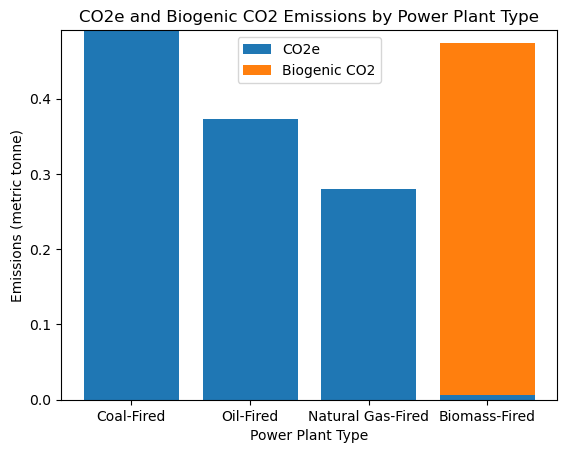

In [156]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['Coal-Fired', 'Oil-Fired', 'Natural Gas-Fired', 'Biomass-Fired']
co2e = [co2_response_coal_fired['CO2e'], co2_response_oil_fired['CO2e'], co2_response_naturalgas_fired['CO2e'], co2_response_biomass_fired['CO2e']]
biogenic_carbon = [co2_response_coal_fired['biogenicCO2'], co2_response_oil_fired['biogenicCO2'], co2_response_naturalgas_fired['biogenicCO2'], co2_response_biomass_fired['biogenicCO2']]
fig, ax = plt.subplots()

# Stacked Bar Chart
ax.bar(labels, co2e, label='CO2e')
ax.bar(labels, biogenic_carbon, bottom=co2e, label='Biogenic CO2')

ax.set_xlabel('Power Plant Type')
ax.set_ylabel('Emissions (metric tonne)')
ax.set_title('CO2e and Biogenic CO2 Emissions by Power Plant Type')
ax.legend()

plt.show()

The data reveals that for the same energy consumption, coal-fired power plants have the highest CO2e emissions, followed by oil-fired and natural gas-fired plants. Biomass-fired plants emit the least CO2e. In contrast, biogenic carbon, which is CO2 that is derived from recent biological processes rather than fossil sources, is significant only in biomass-fired plants.

## Related Links

[GHG Emissions API Developer Guide](https://developer.ibm.com/apis/catalog/envintelsuite--ibm-environmental-intelligence/GHG+Emissions+API)